In [4]:
using Flux
using Flux: onehotbatch, onecold, crossentropy, throttle
using RDatasets
using MLDatasets

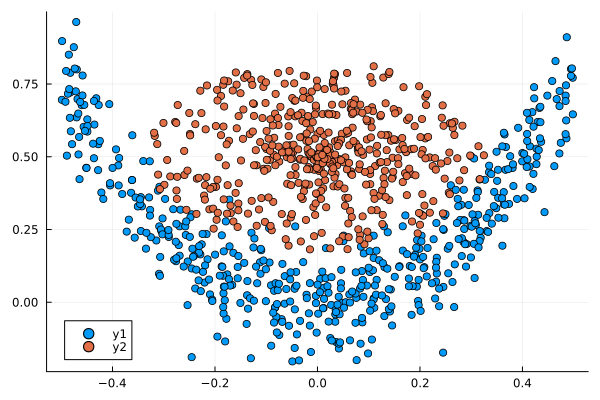

In [8]:
using Plots
using Statistics

#Auxiliary functions for generating our data
function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end

function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end

# Creating our data
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)
# Visualizing
scatter(real[1,1:500],real[2,1:500])
scatter!(fake[1,1:500],fake[2,1:500])

In [9]:
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

# Organizing the data in batches
X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);
# Defining our model, optimization algorithm and loss function
m    = NeuralNetwork()
opt = Descent(0.05)
loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))

loss (generic function with 1 method)

In [10]:
# Training method 1 

ps = Flux.params(m)
epochs = 20
for i in 1:epochs
    Flux.train!(loss, ps, data, opt)
end
println(mean(m(real)),mean(m(fake))) # Print model prediction

0.81210390.20676333


┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 25, relu)
│   summary(x) = 2×100 Matrix{Float64}
└ @ Flux C:\Users\springnuance\.julia\packages\Flux\u7QSl\src\layers\stateless.jl:60


In [11]:
# Training method 2

m = NeuralNetwork()
function trainModel!(m,data;epochs=20)
    for epoch = 1:epochs
        for d in data
            gs = gradient(Flux.params(m)) do
                l = loss(d...)
            end
            Flux.update!(opt, Flux.params(m), gs)
        end
    end
    @show mean(m(real)),mean(m(fake))
end

trainModel!(m,data;epochs=20)

(mean(m(real)), mean(m(fake))) = (0.80267346f0, 0.21072769f0)


(0.80267346f0, 0.21072769f0)

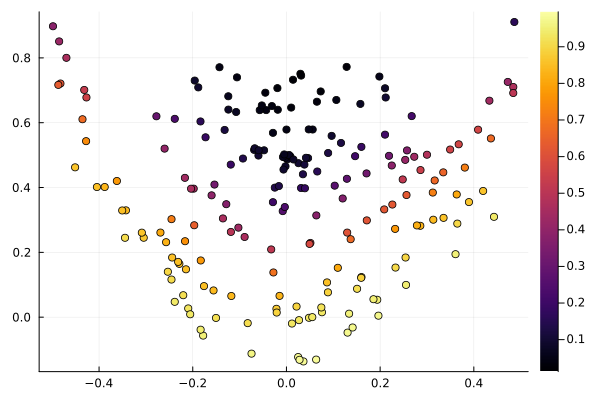

In [12]:
scatter(real[1,1:100],real[2,1:100],zcolor=m(real)')
scatter!(fake[1,1:100],fake[2,1:100],zcolor=m(fake)',legend=false)